# Hierarchical clustering


Dentro do Machine Learning são inúmeras as naturezas que um conjunto de dados a ser utilizado em um modelo pode assumir. Assim sendo, tão diverso quanto os âmagos de cada conjunto, são os métodos de agrupá-los. Afinal, características distintas demandam algoritmos - também distintos - para lograr um maior êxito nas previsões feitas pelo modelo implementado.<br>

Por exemplo, imaginemos uma situação na qual temos informações acerca de um aglomerado de compradores e queremos dividí-los em função do seu perfil de compra. Por tratar-se de um conjunto cujo número de clusters é desconhecido, o método de Clusterização Hierárquica apresenta-se como uma excelente opção. Pois, esse método de classificação tem como um de seus resultados a construção de um dendrograma, que é um instrumento capaz de nos mostrar a relação de proximidade entre os elementos.<br>

   O algoritmo hierárquico de clusterização pode ser empregado de duas formas:
    
1 – Modo aglomerativo: O algoritmo inicia com todos os elementos da matriz separados em grupos distintos e, a cada passo, os dois grupos mais próximos são agrupados. Este processo repete-se até que haja somente um único grupo como objeto final.
<br>
2 – Modo divisivo: Aqui há o processo inverso do modo supracitado, o algoritmo começa com um único grupo e os vai dividindo em pares até que restem os objetos isolados da matriz inicial.
O modo adotado na literatura clássica – e que também adotaremos aqui – é o primeiro modo.
<br><br>
Vale notar que o processo de encontrar os dois grupos mais próximos é feito através de um dos métodos abaixos:
<br>
  • Single: A distância entre os grupos é mensurada através da distância mínima encontrada entre os objetos que os compõem.
<br>
    • Complete: Diferente do primeiro método, o critério é a distância máxima entre os objetos.
<br>
    • Average: Já aqui, o que é levado em consideração é a distância média entre os objetos.
<br>
    • Centroid: É considerada a distância entre os centroides dos dois clusters.
<br>
    • Ward: Caso os dois clusters selecionados unam-se, medirá como mudará a distância total em relação aos centroides originais.
<br><br>
Agora que os fundamentos teóricos básicos foram introduzidos, vamos a um exemplo prático para fixá-los. Trabalharemos com um dataset que contém informações sobre compradores\footnote{O download do dataset encontra-se no drive junto com o material da apostila}.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Biblioteca responsável pela plotagem dos gráficos
import scipy.cluster.hierarchy as shc #Biblioteca responsável pela construção do dendrograma.
from sklearn.cluster import AgglomerativeClustering #Biblioteca responsável pelo fit dos dados.

data = pd.read_csv("/home/murilo/Downloads/shopping_data.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


O dataset é composto pelas colunas CustomerID, Genre, Age, Annual Income(Mensurado em milhares de reais) e Spending Score. Destas, restringir-nos-emos as duas últimas que apresentam as inputs úteis ao nosso processo. A primeira aponta o rendimento anual e a segunda a propensão  a consumir, sendo 0 o mínimo e 100 o máximo.

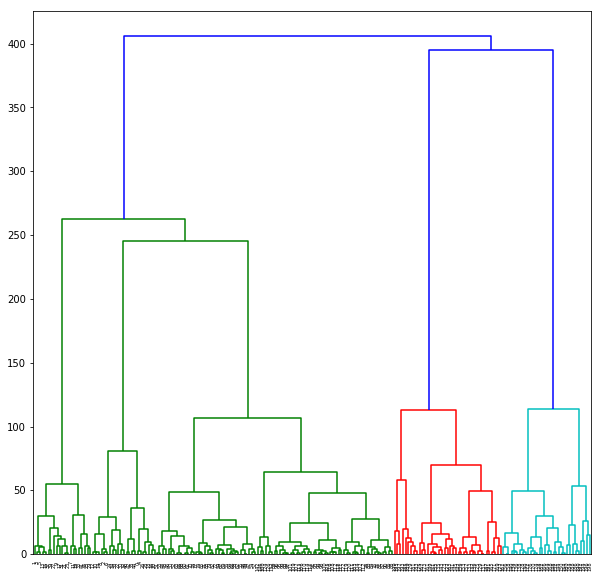

In [9]:
infos = data.iloc[:,3 :5].values #Seleção das duas referidas colunas.

plt.figure(figsize=(10,10)) #Dimensões do gráfico que será plotado.
link = shc.linkage(infos, method='ward') #Realiza a união dos grupos utilizando o método ward.
dendrogram = shc.dendrogram(link) #Constroi o dendrograma.

plt.show() #Exibe-o.

Algo interessante a se notar no dendrograma é o fato do tamanho das linhas verticais representarem a distância demandada no agrupamento. Ou seja, o ideal é aguardar surgir extensas linhas para escolher o número de clusters. No caso deste dataset, é notável que isso ocorre após a formação de 5 grupos. Com o número em mãos, resta-nos partir para a clusterização.

In [10]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(infos)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

Como é possível visualizar acima, a função retorna uma lista nos informando o grupo que cada elemento da matriz pertence, vamos, portanto, plotar o gráfico final já com essa divisão.

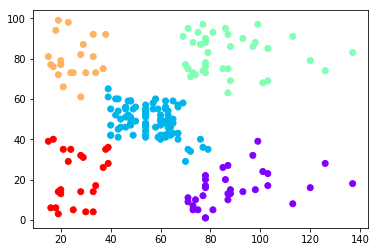

In [11]:
#O eixo X será representado pelo rendimento anual e o Y pela proprensão a consumir.
plt.scatter(infos[:,0], infos[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()

No agrupamento acima, é possível visualizar claramente os cinco clusters. Por exemplo, o vermelho representa indivíduos que ganham pouco e também tendem a consumir pouco, já o roxo é formado por pessoas que ganham muito, mas, consomem pouco.